<a href="https://colab.research.google.com/github/Karikiri/Back-Propagation-Neural-Network/blob/main/Back_Propagation_Neural_Network_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import random

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt


In [ ]:
def one_hot_encode(y):
  encoded = np.zeros((3, 1))
  encoded[y] = 1.0
  return encoded

In [ ]:
class SplitDataset:
  def __init__(self):
    print('Split Dataset')

  def split_dataset(df):
    # Return random sample from dataset to be training, validation, testing sets
    train, test = df.iloc[:120,:], df.iloc[120:,:]
    return train, test
  
  # Last column as label, other as attributes
  def train_dataset(train):
    # Extract train x, turn label{0,1,2} to one hot coding 
    train_x = train[[train.columns[i] for i in range(train.shape[1]-1) ]]
    train_y = [one_hot_encode(y) for y in train[train.columns[-1]]]

    # Change train x and y to ndarray
    train_x = np.asarray(train_x, dtype='float64')
    train_y = np.asarray(train_y, dtype='float64')
    
    # Reshape the train x to (90, 4), train y to (90, 3)
    train_x = [np.reshape(x,(4,1)) for x in train_x]

    # Pack the attributes and label to training set
    train = zip(list(train_x), list(train_y))

    return list(train)

  def test_dataset(test):
    test_x = test[[test.columns[i] for i in range(test.shape[1]-1) ]]
    eval_y = test[test.columns[-1]]
    test_y = [one_hot_encode(y) for y in test[test.columns[-1]]]

    # Change test x and y to ndarray
    test_x = np.asarray(test_x, dtype='float64')
    test_y = np.asarray(test_y, dtype='float64')

    test_x = [np.reshape(x,(4,1)) for x in test_x]

    test = zip(list(test_x), list(test_y))
    return list(test), list(eval_y)



In [ ]:
# Access Iris Dataset from sklearn datasets
iris_df = pd.DataFrame((datasets.load_iris()).data)
print(iris_df)
iris_df['label']=(datasets.load_iris()).target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'label']

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [ ]:
print(iris_df)

     sepal_len  sepal_wid  petal_len  petal_wid  label
0          5.1        3.5        1.4        0.2      0
1          4.9        3.0        1.4        0.2      0
2          4.7        3.2        1.3        0.2      0
3          4.6        3.1        1.5        0.2      0
4          5.0        3.6        1.4        0.2      0
..         ...        ...        ...        ...    ...
145        6.7        3.0        5.2        2.3      2
146        6.3        2.5        5.0        1.9      2
147        6.5        3.0        5.2        2.0      2
148        6.2        3.4        5.4        2.3      2
149        5.9        3.0        5.1        1.8      2

[150 rows x 5 columns]


In [ ]:
# Randomise the Iris Flower Dataset
iris_df = iris_df.reindex(np.random.permutation(iris_df.index))                                                          
print("Randomized data by randomizing the index : ")
iris_df

Randomized data by randomizing the index : 


,sepal_len,sepal_wid,petal_len,petal_wid,label
93,5.0,2.3,3.3,1.0,1
95,5.7,3.0,4.2,1.2,1
76,6.8,2.8,4.8,1.4,1
83,6.0,2.7,5.1,1.6,1
44,5.1,3.8,1.9,0.4,0
...,...,...,...,...,...
100,6.3,3.3,6.0,2.5,2
105,7.6,3.0,6.6,2.1,2
16,5.4,3.9,1.3,0.4,0
114,5.8,2.8,5.1,2.4,2


In [ ]:
# Split Iris Dataset to training set, validation set, testing set
iris_train, iris_test = SplitDataset.split_dataset(iris_df)

In [ ]:
print(len(iris_train))
print(len(iris_test))

120
30


In [ ]:
# Split each set to attributes and label
iris_train = SplitDataset.train_dataset(iris_train)
iris_test, eval_y = SplitDataset.test_dataset(iris_test) # eval_y is  true y for evaluation

In [ ]:
# Activation Function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
 
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
class Network:
  # sizes is a list of the number of nodes in each layer
  def __init__(self, sizes):
    self.num_layers = len(sizes) # num_layer =  3
    self.sizes = sizes # size =  [4, 5, 3]
    self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
    self.weights = [np.random.randn(y, x) for x,y in zip(sizes[:-1], sizes[1:])]

  # forward current input vector
  def forward(self, activation_vector):
    for b, w in zip(self.biases, self.weights):
        activation_vector = sigmoid(np.dot(w, activation_vector) + b)
    return activation_vector
  
  def cost_derivative(self, output_activations, y):
    return(output_activations - y)

  def backprop(self, x, y):
    # Initialise 
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    # feedforward
    activation = x
    activations = [x] # stores activations layer by layer
    zs = [] # stores z vectors layer by layer
    for b, w in zip(self.biases, self.weights):
      z = np.dot(w, activation) + b
      zs.append(z)
      activation = sigmoid(z)
      activations.append(activation)
   
    # backward pass
    delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())

    for _layer in range(2, self.num_layers):
        z = zs[-_layer]
        sp = sigmoid_prime(z)
        delta = np.dot(self.weights[-_layer+1].transpose(), delta) * sp
        nabla_b[-_layer] = delta
        nabla_w[-_layer] = np.dot(delta, activations[-_layer-1].transpose())
    return (nabla_b, nabla_w)

  def SGD(self, training_data, epochs, mini_batch_size, lr, test_data):
    samples = len(training_data) 
    if test_data:
        n_test = len(test_data)
    
    for j in range(epochs):
        random.shuffle(training_data)
        mini_batches = [training_data[k:k+mini_batch_size]
                        for k in range(0, samples, mini_batch_size)]
        for mini_batch in mini_batches:
            self.update_mini_batch(mini_batch, lr)
        if test_data:
            print(f"Epoch {j+1}: {self.evaluate(test_data)} / {n_test}")
        else:
            print(f"Epoch {j+1} complete")

  def update_mini_batch(self, mini_batch, lr):
    # Initialisation of bias and weights matrices with zeros in shape of the preset bias and weights
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = self.backprop(x, y)
        nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    self.weights = [w-(lr/len(mini_batch))*nw
                    for w, nw in zip(self.weights, nabla_w)]
    self.biases = [b-(lr/len(mini_batch))*nb
                   for b, nb in zip(self.biases, nabla_b)]

  def evaluate(self, test_data):
    #return the indices of the maximum values along an axis
    test_results = [(np.argmax(self.forward(x)), y)
                    for (x, y) in test_data] # x -> input features | y -> labels
    #print(test_results)
    return sum(int(y[x]) for (x, y) in test_results)

  def confusion_matrix(self, test_data, true_y):
    test_results = [(np.argmax(self.forward(x)), y)
                    for (x, y) in test_data]
    pred_y = []
    for i in range(len(test_results)):
      pred_y.append(test_results[i][0])
    # Create Confusion Matrix 
    y_actu = pd.Series(true_y, name='Actual')
    y_pred = pd.Series(pred_y, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    return df_confusion



In [ ]:
# Initialisation of BPNN
net = Network([4, 5, 3]) # 3 layers
net.SGD(iris_train, 50, 5, 1.0, test_data=iris_test)

Epoch 1: 17 / 30
Epoch 2: 18 / 30
Epoch 3: 18 / 30
Epoch 4: 18 / 30
Epoch 5: 24 / 30
Epoch 6: 18 / 30
Epoch 7: 18 / 30
Epoch 8: 18 / 30
Epoch 9: 18 / 30
Epoch 10: 18 / 30
Epoch 11: 18 / 30
Epoch 12: 18 / 30
Epoch 13: 18 / 30
Epoch 14: 19 / 30
Epoch 15: 20 / 30
Epoch 16: 18 / 30
Epoch 17: 21 / 30
Epoch 18: 18 / 30
Epoch 19: 18 / 30
Epoch 20: 19 / 30
Epoch 21: 19 / 30
Epoch 22: 26 / 30
Epoch 23: 18 / 30
Epoch 24: 20 / 30
Epoch 25: 25 / 30
Epoch 26: 18 / 30
Epoch 27: 20 / 30
Epoch 28: 21 / 30
Epoch 29: 28 / 30
Epoch 30: 20 / 30
Epoch 31: 24 / 30
Epoch 32: 19 / 30
Epoch 33: 26 / 30
Epoch 34: 24 / 30
Epoch 35: 24 / 30
Epoch 36: 29 / 30
Epoch 37: 18 / 30
Epoch 38: 19 / 30
Epoch 39: 26 / 30
Epoch 40: 30 / 30
Epoch 41: 25 / 30
Epoch 42: 26 / 30
Epoch 43: 26 / 30
Epoch 44: 28 / 30
Epoch 45: 22 / 30
Epoch 46: 27 / 30
Epoch 47: 27 / 30
Epoch 48: 27 / 30
Epoch 49: 30 / 30
Epoch 50: 26 / 30


In [ ]:
# Confusion_Matrix 
df_confusion = net.confusion_matrix(test_data=iris_test,true_y=eval_y)
print(df_confusion)

Predicted  0   1  2
Actual             
0          8   0  0
1          0  12  0
2          0   4  6


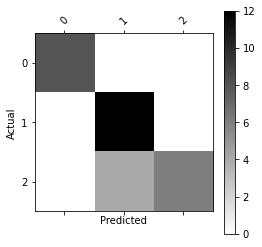

In [ ]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)